In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
 	rng = np.random.default_rng(seed)
 	hours_studied = rng.normal(5, 2, n).clip(1, 10)
 	marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 	gender = rng.choice(['Male', 'Female'], n)
 	subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 	study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 	attempts = rng.integers(1, 4, n)
 	return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
 	rng = np.random.default_rng(seed)
 	base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 	trend = np.linspace(50, 80, n)
 	season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 	noise = rng.normal(0, 3, n)
 	sales = (trend + season + noise).round(2)
 	return pd.DataFrame({'date': base, 'sales': sales})

# Generate the datasets
students = generate_students(220)
sales = generate_daily_sales(90)

print("Students DataFrame head:")
display(students.head())
print("\nSales DataFrame head:")
display(sales.head())

Students DataFrame head:


,hours_studied,marks,gender,subject,study_method,attempts
0,5.61,54.04,Male,English,Solo,2
1,2.92,30.00,Female,Science,Solo,2
2,6.50,70.46,Female,History,Group,3
3,6.88,52.76,Female,English,Group,3
4,1.10,30.00,Female,History,Solo,1



Sales DataFrame head:


,date,sales
0,2024-01-01,50.91
1,2024-01-02,48.06
2,2024-01-03,54.61
3,2024-01-04,56.33
4,2024-01-05,48.78


### 1. Lineplot of `date` vs `sales`

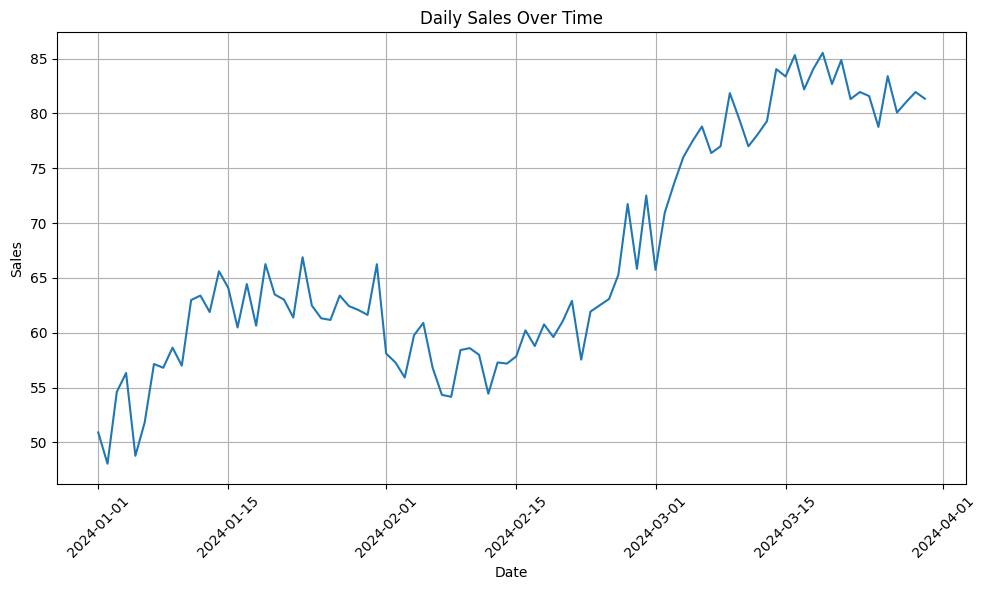

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sales', data=sales)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Scatter plot of `hours_studied` vs `marks` colored by `gender`

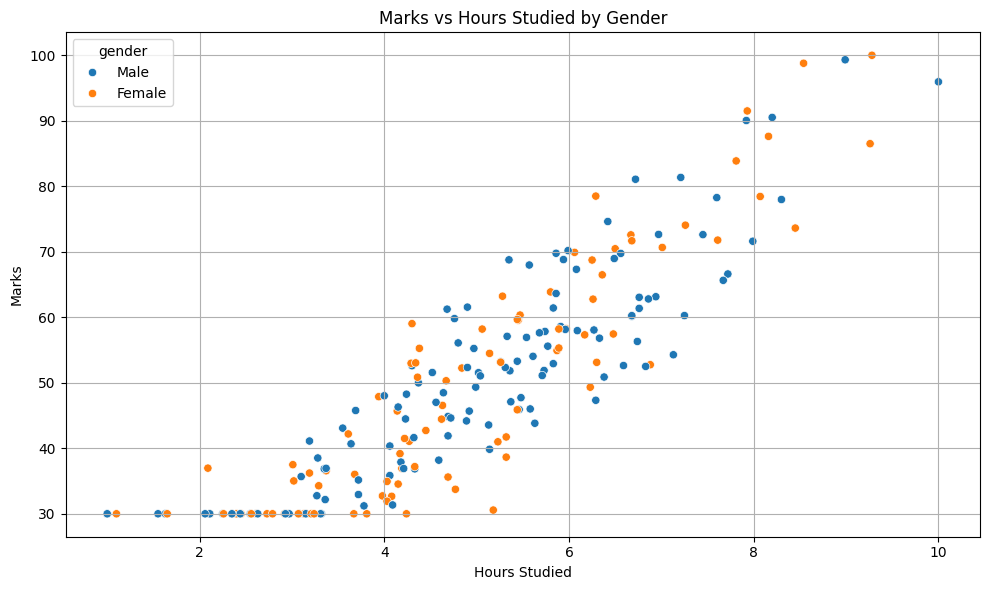

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_studied', y='marks', hue='gender', data=students)
plt.title('Marks vs Hours Studied by Gender')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Grid of scatterplots (`hours_studied` vs `marks`) faceted by `subject`

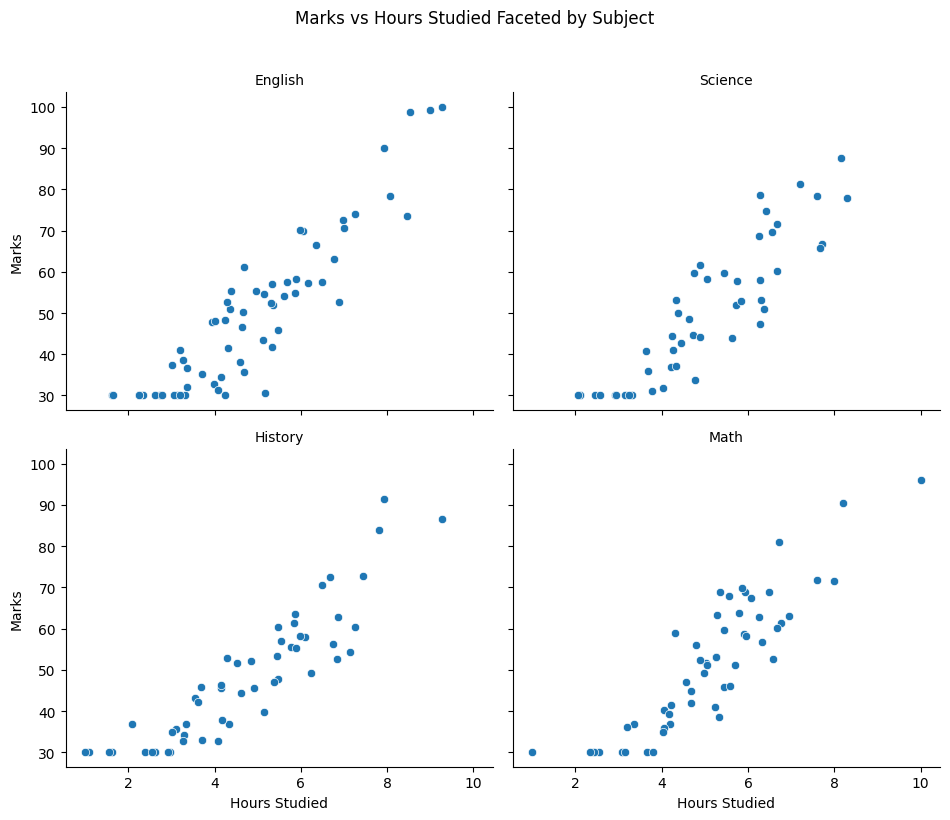

In [29]:
g = sns.FacetGrid(students, col='subject', col_wrap=2, height=4, aspect=1.2)
g.map(sns.scatterplot, 'hours_studied', 'marks')
g.set_titles("{col_name}")
g.set_axis_labels("Hours Studied", "Marks")
plt.suptitle('Marks vs Hours Studied Faceted by Subject', y=1.02)
plt.tight_layout()
plt.show()

### 4. Histogram of `marks` with a KDE overlay

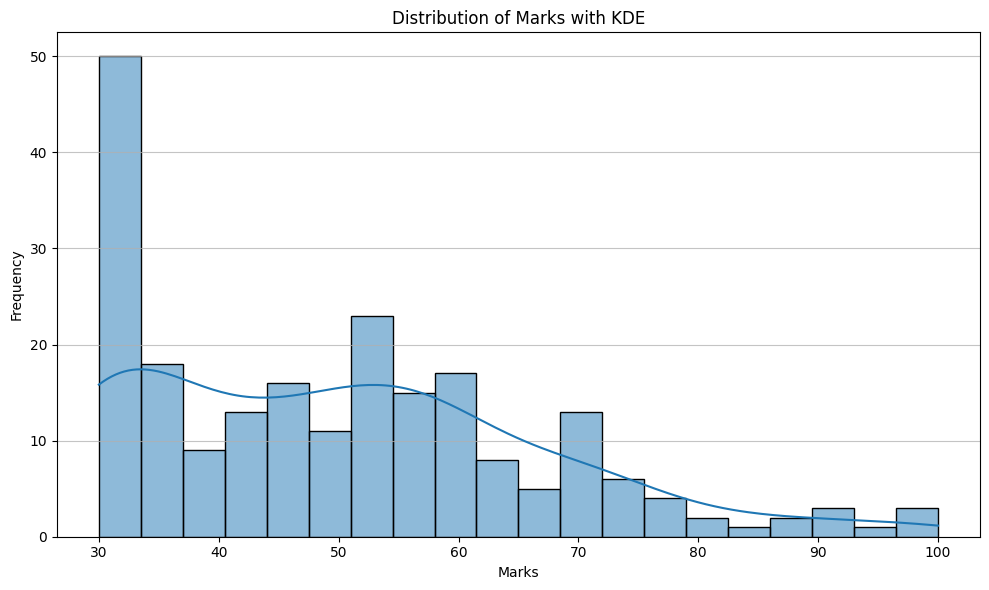

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(students['marks'], kde=True, bins=20)
plt.title('Distribution of Marks with KDE')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### 5. KDE curve for `hours_studied`

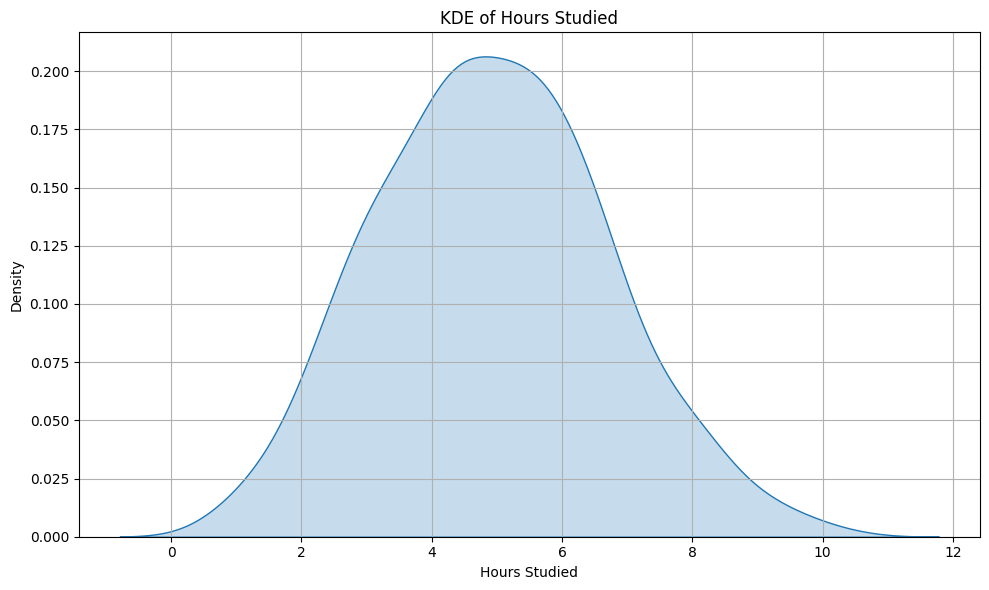

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(students['hours_studied'], fill=True)
plt.title('KDE of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

### 6. Count of records per `subject`

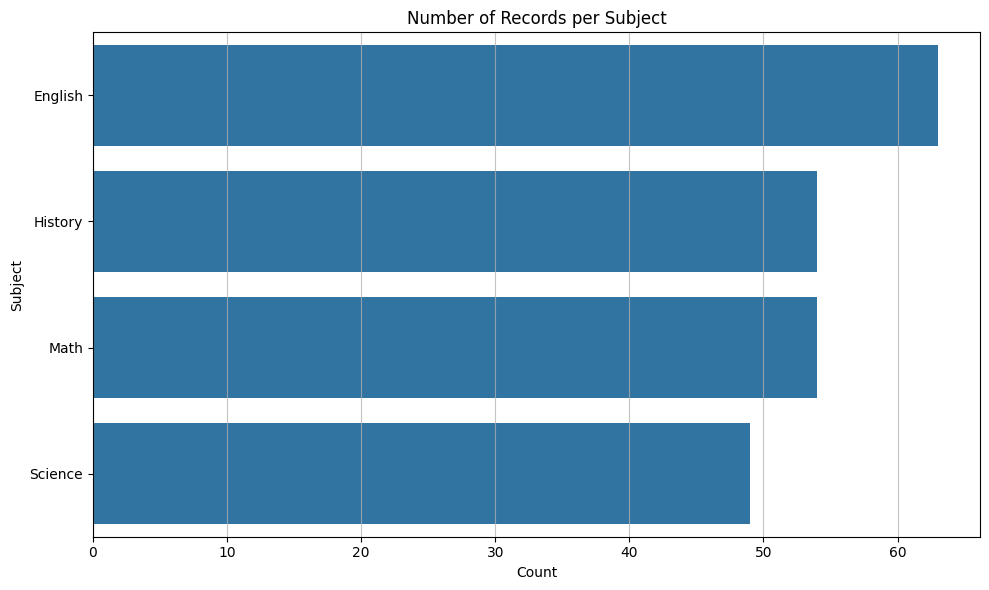

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(y='subject', data=students, order=students['subject'].value_counts().index)
plt.title('Number of Records per Subject')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

### 7. Regression line for `hours_studied` and `marks`

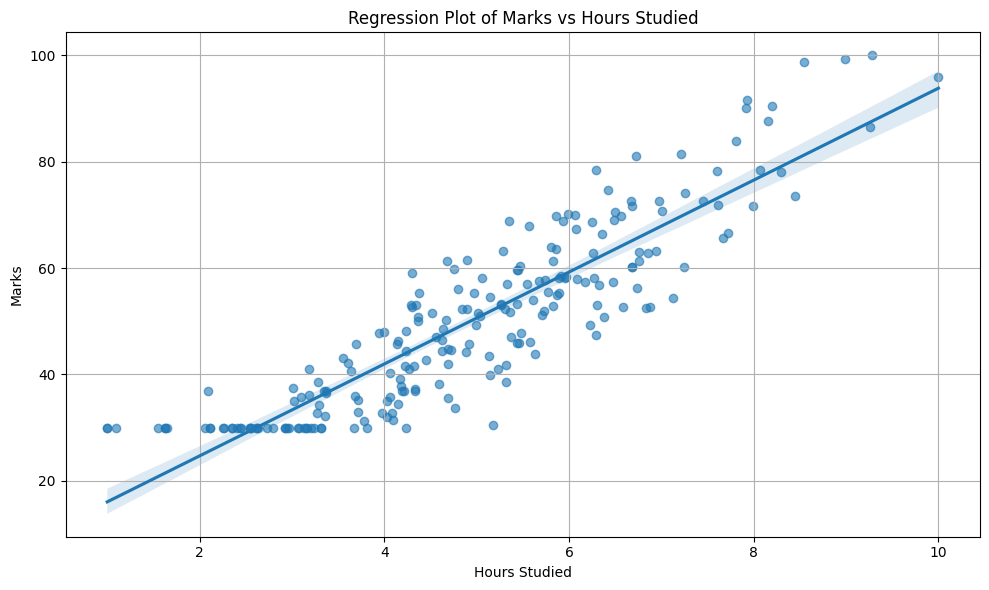

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='hours_studied', y='marks', data=students, scatter_kws={'alpha':0.6})
plt.title('Regression Plot of Marks vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

### 8. Pairplot and Jointplot for students' dataset

Pairplot for students dataset:


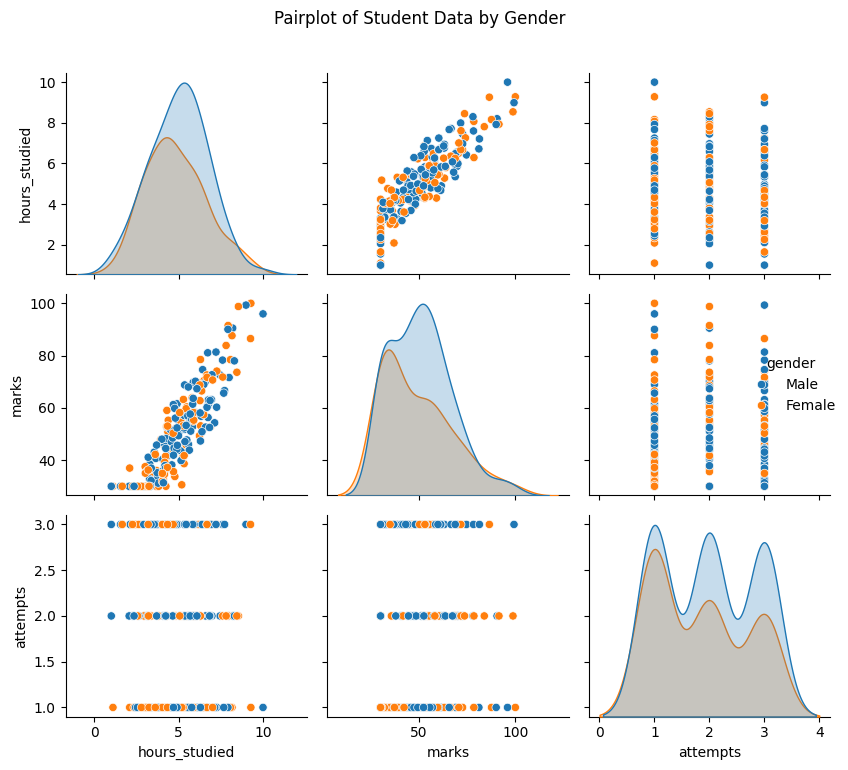

In [34]:
print("Pairplot for students dataset:")
sns.pairplot(students, hue='gender')
plt.suptitle('Pairplot of Student Data by Gender', y=1.02)
plt.tight_layout()
plt.show()


Jointplot of Hours Studied vs Marks:


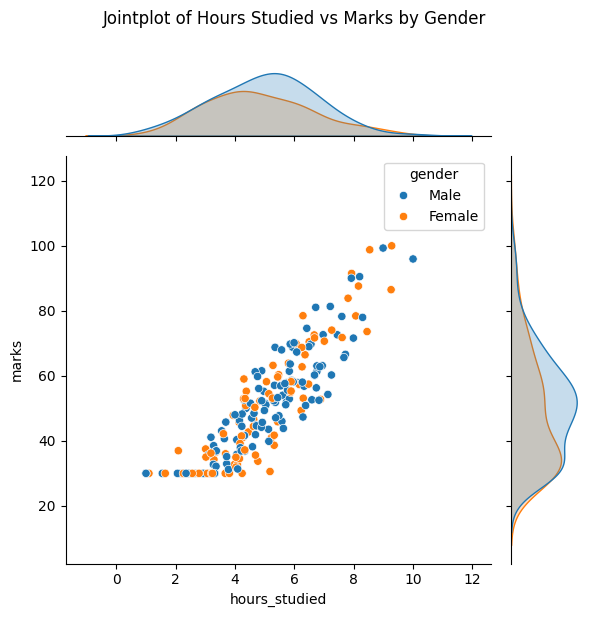

In [35]:
print("\nJointplot of Hours Studied vs Marks:")
sns.jointplot(x='hours_studied', y='marks', data=students, kind='scatter', hue='gender')
plt.suptitle('Jointplot of Hours Studied vs Marks by Gender', y=1.02)
plt.tight_layout()
plt.show()

### 9. Plotly scatter plot of `hours_studied` vs `marks` colored by `gender`

In [36]:
fig_plotly_scatter = px.scatter(
    students,
    x='hours_studied',
    y='marks',
    color='gender',
    title='Marks vs Hours Studied by Gender (Plotly)',
    labels={'hours_studied': 'Hours Studied', 'marks': 'Marks'}
)
fig_plotly_scatter.show()

### 10. Plotly line chart of `sales` over `date` and a histogram of `marks`

In [37]:
fig_plotly_line = px.line(
    sales,
    x='date',
    y='sales',
    title='Daily Sales Over Time (Plotly)',
    labels={'date': 'Date', 'sales': 'Sales'}
)
fig_plotly_line.show()

In [38]:
fig_plotly_hist = px.histogram(
    students,
    x='marks',
    nbins=20,
    title='Distribution of Marks (Plotly)',
    labels={'marks': 'Marks', 'count': 'Frequency'}
)
fig_plotly_hist.show()